# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its graph and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [1]:
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [2]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [3]:
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
from scipy.sparse import csr_matrix
adjacency_matrix = csr_matrix((data.rating.values , (data.user_id.values,data.item_id.values)))

## In above step we have created a sparse matrix representation of the dataframe representation , we have created a sparse matrix because it gives us a clear picture of which user has interacted with which movie and has given how much rating .


In [4]:
adjacency_matrix.shape

(943, 1681)

## While describing the shape of sparse matrics we saw that we have 943 rows and 1681 columns 

<font color='red'>Sparseity of Sparse Matrix </font>

In [5]:
##https://stackoverflow.com/questions/38708621/how-to-calculate-percentage-of-sparsity-for-a-numpy-array-matrix
## formula for sparsity = (1-(non_zero_val/total_elements))
row , column = adjacency_matrix.shape
non_zero_val = adjacency_matrix.count_nonzero()

print("Sparsity of Matrix is ", (1-(non_zero_val/(row*column)))*100)

Sparsity of Matrix is  94.32292675356724


## In above function I have calculated the sparsity of sparse matrix which which how much a perticulare sparse matrix is sparse means how many zero values it has , so our data has around 94% of zero values which means we have a very sparse metrics .

<font color='cyan'>Grader function - 1</font>

In [6]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

**The unique items in the given csv file are 1662 only . But the id's vary from 0-1681 but they are not continuous and hence 
you'll get matrix of size 943x1681.**

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [7]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [8]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
## https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=10,n_iter=10, random_state=None)
print(U.shape)
print(Sigma.shape)
VT_transpose = VT.T
print(VT_transpose.shape)

(943, 10)
(10,)
(1681, 10)


## We can see shape of U is (943,10) , Sigma is (10,) , VT.transpose  is (1681,10) so U×Sigma×VT = A , shape of A = (943×10 , 10, 10×1681 = 943 ×10 , 10×1681 = 943×1681 ), WHICH IS THE ACTUAL SHAPE OF A hence our values of U,Sigma , VT are correct .

<font color='red'>Compute mean of ratings</font>

In [9]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    average_rating = ratings.mean()

    return average_rating

## In above function we are calculating the average rating of all the ratings in the entire data and we are using simple mean function 

In [10]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


## We got the average mean of ratings as 3.5394

<font color='cyan'>Grader function -2 </font>

In [11]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [12]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    initialise_value = np.zeros(dim)
    # return output as a list of zeros 
    return initialise_value

## Initialised a dim function where we have created a matrix which has is filled with zero values .

## Creating a bias value for users(b_i) using the above functions 

In [13]:
dim= 943 # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

## we can see that the shape of bias b_i is equal to that of shape of user from the dataset

## Crating a bias value for movies/items(c_j) using the above initialize function 

In [15]:
dim= 1681# give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

## hence shape of bias c_j is equal to shape of movies from the dataset.

<font color='cyan'>Grader function -3 </font>

In [17]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

𝐿=min𝑏,𝑐,{𝑢𝑖}𝑁𝑖=1,{𝑣𝑗}𝑀𝑗=1𝛼(∑𝑗∑𝑘𝑣2𝑗𝑘+∑𝑖∑𝑘𝑢2𝑖𝑘+∑𝑖𝑏2𝑖+∑𝑗𝑐2𝑖)+∑𝑖,𝑗∈train(𝑦𝑖𝑗−𝜇−𝑏𝑖−𝑐𝑗−𝑢𝑇𝑖𝑣𝑗)2

so dL/d b_i(partial derivative of user_id) = (2×b_i)+(-2×(yij-𝜇-bi-cj-(User×Item Transpose)

In [18]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    der = ((2*alpha*b_i[user_id])+(-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id]))))
    return der


## To calculate the derivative of user id or to calculate dL/db_i we have used simple partial derivatives formula , applied it to L and got the value of derivative 

<font color='cyan'>Grader function -4 </font>

In [19]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

𝐿=min𝑏,𝑐,{𝑢𝑖}𝑁𝑖=1,{𝑣𝑗}𝑀𝑗=1𝛼(∑𝑗∑𝑘𝑣2𝑗𝑘+∑𝑖∑𝑘𝑢2𝑖𝑘+∑𝑖𝑏2𝑖+∑𝑗𝑐2𝑖)+∑𝑖,𝑗∈train(𝑦𝑖𝑗−𝜇−𝑏𝑖−𝑐𝑗−𝑢𝑇𝑖𝑣𝑗)2

so dL/d b_i(partial derivative of user_id) = (2×c_j)+(-2×(yij-𝜇-bi-cj-(User×Item Transpose)

In [20]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    der = ((2*alpha*c_j[item_id])+(-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id]))))

    return der


## To calculate the derivative of Item id or to calculate dL/dc_j we have used simple partial derivatives formula , applied it to L and got the value of derivative .

<font color='cyan'>Grader function - 5 </font>

In [21]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,alpha)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [22]:
from datetime import datetime
from sklearn.metrics import mean_squared_error

start = datetime.now()
actual_y = data['rating']
mse_val = []    ## list to store the mean square value
learning_rate = 0.02   ## initialilly setting the learning rate to 0.02
## for each epoch (as the number of epochs are not given so we are taking 20 epochs)
for epoch in range(1,21):
#     print(epoch)
    predicted_y = []   ## predicted value of y after geting the rating with formula 
    ## for every pair of user and item in the dataset
    for index, row in data.iterrows():
#         print(row["user_id"],row["item_id"],row["rating"])
       ## deriving the derivatives of both the user and the item using the derivative function defined above 
        derivative_b_i = derivative_db(row["user_id"],row["item_id"],row["rating"],U,VT,mu,alpha)
        derivative_c_j = derivative_dc(row["user_id"],row["item_id"],row["rating"],U,VT,mu,alpha)
        
        ## getting the values of b_i abd c_j required for calculating the predicted value, b_i and c_j are calculated using the formula given(b_i = b_i - learning_rate * dL/db_i and c_j = c_j - learning_rate * dL/dc_j)
        b_i[row["user_id"]]=b_i[row["user_id"]]-learning_rate*derivative_b_i 
        c_j[row["item_id"]]=c_j[row["item_id"]]-learning_rate*derivative_c_j
        
        ## calculating the predicted rating using the formula for predicted value 𝑦̂ 𝑖𝑗=𝜇+𝑏𝑖+𝑐𝑗+dot_product(𝑢𝑖,𝑣𝑗)
        predicted_val = mu + b_i[row["user_id"]] + c_j[row["item_id"]] + np.dot(U[row["user_id"]],VT.T[row["item_id"]])
        predicted_y.append(predicted_val)
#     print(len(predicted_y))
    ## calculating the mean square error to see how the error changes with each epoch 
    mse = mean_squared_error(actual_y,predicted_y)
    mse_val.append(mse)
#     print(mse_val)
#     print(len(mse_val))

    print("Epoch value"+" "+str(epoch))  
    print("Mean Square coresponding epoch value is  :",mse)

print('\n')
print("Total time taken by the cell to run is:", datetime.now() - start)


Epoch value 1
Mean Square coresponding epoch value is  : 0.8114377801893156
Epoch value 2
Mean Square coresponding epoch value is  : 0.7570853356838882
Epoch value 3
Mean Square coresponding epoch value is  : 0.7504137265089669
Epoch value 4
Mean Square coresponding epoch value is  : 0.7480212854311481
Epoch value 5
Mean Square coresponding epoch value is  : 0.7468260668289235
Epoch value 6
Mean Square coresponding epoch value is  : 0.746106153205611
Epoch value 7
Mean Square coresponding epoch value is  : 0.7456214318151877
Epoch value 8
Mean Square coresponding epoch value is  : 0.745271362353424
Epoch value 9
Mean Square coresponding epoch value is  : 0.7450062699756851
Epoch value 10
Mean Square coresponding epoch value is  : 0.744798527132397
Epoch value 11
Mean Square coresponding epoch value is  : 0.7446314134706515
Epoch value 12
Mean Square coresponding epoch value is  : 0.744494167796946
Epoch value 13
Mean Square coresponding epoch value is  : 0.7443795356574133
Epoch value 

In [23]:
print(len(mse_val))

20


## Total time taken to execute the the cell and to calculate the mse value is around 2 minutes and we saw that as the epoch increases the mean square value decresses .

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

In [24]:
## Importing library for 
import matplotlib.pyplot as plt
## defining the epochs 
epochs = [] 
for epoch in range(1,21):
    epochs.append(epoch)
# print(epochs)
## definig the value of train loss 
mean_square_val = mse_val
# print(mean_square_val)
# print(len(mse_val))

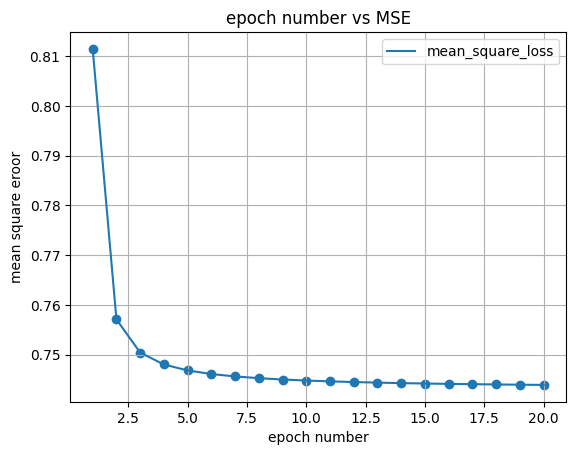

In [25]:
## plotting graph for train and test loss using matplotplib library
# plt.plot(figure(fig_size(8,6)))
plt.grid()

plt.plot(epochs , mean_square_val , label = "mean_square_loss")
plt.scatter(epochs,mean_square_val)
plt.xlabel("epoch number")
plt.ylabel("mean square eroor")
plt.title("epoch number vs MSE")
plt.legend()

## We can clearly observe that the fall from epoch number 1 to epoch number 2 is huge but after that there is a slope in which the values are decressing , this means that the mean square error decresses very rapidly from epoch 1 to epoch 2 , although after epoch 2 the mse value decresses but there is a very little change .

<br>

# <font color='red'> Task 2</font>

- For this task you have to consider the user_matrix U and the user_info.csv file.
- You have to consider is_male columns as  output features and rest as input features. Now you have to fit a model by posing this problem as binary classification task.
- You can apply any model like Logistic regression or Decision tree and check the performance of the model. 
- Do plot confusion matrix after fitting your model and write your observations how your model is performing in this task.

- Optional work- You can try scaling your U matrix.Scaling means changing the values of n_componenets while performing svd
  and then check your results.

## 1.Considering the user matrix U and the user_info file

In [26]:
df=pd.read_csv('user_info.csv.txt')
df.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [27]:
print(df.shape)

(943, 4)


## 2.Considering is_male as output feature and rest all as input feature. 

In [28]:
x = U   ##considering the user matrix U for the binary classification 
y = df['is_male']   ##considering is_male column as target variable 

In [29]:
## Now this is a binary classification problem as we have divided the dataset into x and y .

In [30]:
print(x.shape)
print(y.shape)

(943, 10)
(943,)


## 3.Applying decision tree model to check the performance of the model

In [31]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(x,y)
predict_decision_tree = decision_tree.predict(x)

## I have used both the models so that I can compare both the results .

## 4.Plotting Confusion Matrix for decision tree and getting accuracy score 

In [33]:
## https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
confusion_matrix(y,predict_decision_tree)

array([[ 74, 199],
       [ 47, 623]])

In [34]:
## Getting the Accuracy Score for Decision Regression

In [35]:
## https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score
accuracy_score(y ,predict_decision_tree)

0.7391304347826086

## After applying Decision tree classifier we get the accuracy of 73.91 which is approximately equal to 74% so we can answer the question which was asked in the begining of the notebook which was Do our computed per-user features that are optimized for predicting movies has to anything to do with gender ? The answer is simple that is because we have an accuracy score of 74% percent we can say that per-user features are actually very much related to gender .

## ***Conclusion - Task1***
***In Task 1 we actually saw in detail that how can we predict the ratings given by the user to movie using SGD classifier . 
In this we started by creating a sparse matrix A using csr matrix , then we applied SVD decomposition and got the value of three matrices U, Sigma and V so that when we do the dot product of shapes of these three matrices we get the shape of matrix A , next we computed the average mean of all the ratings given , then we calculated the bias values for both items and user , using these bias values we got the derivatives for both user and item and finally we printed the mean square error value for 20 epochs .***

## ***Observation - Task1***
***In Task 1 we observed that when we finally calculated the mse value for 20 epochs , in first leap that is when the epoch changed from epoch 1 to epoch 2 there was a large drop in mse value but gradually as we move to next epochs the fall in mse value decresses , the mse value was still decreasing but now with a less percentage .***

## ***Conclusion - Task2***
***In Task 2 we considered gender that is is_male as our target value and the User Matrix as the feature variable , then we used decision tree classifier as our model to fit it in x and y and predict the values , then we ploted a confusion matrix and got the accuracy score .***

## ***Observation - Task2***
***We got the aacuracy score as 74% which means that per-user feature are related to gender***

# ***NOTE***

***1. All the code for functions are on the basis of the formulas provided***

***2. All the refrences link are well pasted with the code blocks if any refrence is taken***

***3. Code for calculating mse value using the predicted vaqlue is written according to the psudo code provided***